## 4. Forbes Billionaires of 2021 2.0 (포브스 선정(2021) 세계의 부자들)

## 4-1. 문제정의 및 가설수립
* 세계적으로는 상속보다 창업이 많을 것이고, 우리나라는 상속이 많을 것이다.
* 미국이 가장 부자 수가 많을 것이다.
* 성공한 사람중에는 대학을 나온 사람이 많을 것이다.

## 4-2. 데이터 가져오기

In [1]:
!kaggle datasets download -d alexanderbader/forbes-billionaires-of-2021-20

forbes-billionaires-of-2021-20.zip: Skipping, found more recently modified local copy (use --force to force download)


In [2]:
!mkdir forbes

하위 디렉터리 또는 파일 forbes이(가) 이미 있습니다.


In [3]:
!tar -xvf forbes2021.zip -C forbes

x forbes_billionaires.csv


## 4-3. 데이터 로드하기

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('forbes_billionaires.csv')
df

,Name,NetWorth,Country,Source,Rank,Age,Residence,Citizenship,Status,Children,Education,Self_made
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True
...,...,...,...,...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1.0,China,e-commerce,2674,49.0,"Hangzhou, China",China,NaN,NaN,NaN,True
2751,Zhang Yuqiang,1.0,China,Fiberglass,2674,65.0,"Tongxiang, China",China,NaN,NaN,NaN,True
2752,Zhao Meiguang,1.0,China,gold mining,2674,58.0,"Jilin, China",China,NaN,NaN,NaN,True
2753,Zhong Naixiong,1.0,China,conglomerate,2674,58.0,"Foshan, China",China,NaN,NaN,NaN,True


In [6]:
df.columns = ['이름', '순자산', '나라', '회사', '등수', '나이', '거주지', '시민권', '배우자', '아이 수', '출신대학', '창업여부']
df.head()

,이름,순자산,나라,회사,등수,나이,거주지,시민권,배우자,아이 수,출신대학,창업여부
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True


## 4-4. 데이터 살펴보기

In [7]:
df.shape

(2755, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   이름      2755 non-null   object 
 1   순자산     2755 non-null   float64
 2   나라      2755 non-null   object 
 3   회사      2755 non-null   object 
 4   등수      2755 non-null   int64  
 5   나이      2630 non-null   float64
 6   거주지     2715 non-null   object 
 7   시민권     2739 non-null   object 
 8   배우자     2090 non-null   object 
 9   아이 수    1552 non-null   float64
 10  출신대학    1409 non-null   object 
 11  창업여부    2737 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 258.4+ KB


In [9]:
df.describe()

,순자산,등수,나이,아이 수
count,2755.000000,2755.000000,2630.00000,1552.000000
mean,4.749220,1345.663521,63.26730,2.978093
std,9.615358,772.669811,13.47916,1.618569
min,1.000000,1.000000,18.00000,1.000000
25%,1.500000,680.000000,54.00000,2.000000
50%,2.300000,1362.000000,63.00000,3.000000
75%,4.200000,2035.000000,73.00000,4.000000
max,177.000000,2674.000000,99.00000,23.000000


In [10]:
df.isna().sum()

이름         0
순자산        0
나라         0
회사         0
등수         0
나이       125
거주지       40
시민권       16
배우자      665
아이 수    1203
출신대학    1346
창업여부      18
dtype: int64

In [11]:
df.거주지.value_counts()

Beijing, China              98
New York, New York          96
Moscow, Russia              79
Hong Kong, Hong Kong        77
Shenzhen, China             67
                            ..
Kaliningrad                  1
Chang Hwa County, Taiwan     1
Wien, Austria                1
Beit Yanay, Israel           1
Indian Creek, Florida        1
Name: 거주지, Length: 768, dtype: int64

In [12]:
df.순자산.value_counts()

1.1      150
1.2      146
1.4      122
1.3      115
1.5      106
        ... 
17.5       1
20.5       1
44.1       1
31.7       1
177.0      1
Name: 순자산, Length: 245, dtype: int64

## 4-5. EDA

### 1. 성공한 사람들은 창업일까, 상속일까?

In [13]:
df.창업여부.value_counts()

True     1960
False     777
Name: 창업여부, dtype: int64

In [14]:
KoreaDF = df[df['나라']== 'South Korea']
KoreaDF

,이름,순자산,나라,회사,등수,나이,거주지,시민권,배우자,아이 수,출신대학,창업여부
146,Seo Jung-jin,14.2,South Korea,biotech,145,63.0,"Seoul, South Korea",South Korea,Married,2.0,"Bachelor of Arts/Science, Konkuk University; M...",True
157,Kim Jung-ju,13.3,South Korea,online games,158,53.0,"Seoul, South Korea",South Korea,Married,2.0,"Doctorate, Korea Advanced Institute of Science...",True
251,Kim Beom-su,9.3,South Korea,online services,251,55.0,"Seoul, South Korea",South Korea,Married,2.0,"Bachelor of Science in Engineering, Seoul Nati...",True
298,Jay Y. Lee,8.3,South Korea,Samsung,297,52.0,"Seoul, South Korea",South Korea,Divorced,2.0,"Master of Business Administration, Keio Univer...",False
393,Kwon Hyuk-bin,6.7,South Korea,online games,391,47.0,"Seoul, South Korea",South Korea,Married,2.0,"Bachelor of Arts/Science, Sogang University",True
453,Mong-Koo Chung,6.0,South Korea,Hyundai,451,83.0,"Seoul, South Korea",South Korea,Married,4.0,"Bachelor of Arts/Science, Hanyang University",False
712,Hong Ra-hee,4.1,South Korea,Samsung,705,75.0,"Seoul, South Korea",South Korea,Widowed,3.0,"Bachelor of Arts/Science, Seoul National Unive...",False
723,Suh Kyung-bae,4.1,South Korea,cosmetics,705,58.0,"Seoul, South Korea",South Korea,Married,2.0,"Master of Business Administration, Samuel Curt...",False
774,Euisun Chung,3.8,South Korea,Hyundai,775,50.0,"Seoul, South Korea",South Korea,Married,2.0,"Bachelor of Arts/Science, Korea University; Ma...",False
958,Chey Tae-won,3.2,South Korea,"oil, semiconductor",956,60.0,"Seoul, South Korea",South Korea,Separated,4.0,"Bachelor of Arts/Science, Korea University; Ma...",False


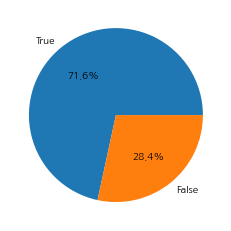

In [15]:
plt.pie(df.창업여부.value_counts(), labels=['True', 'False'], autopct='%.1f%%')
plt.show()

* 세계적으로 봤을때는 창업이 상속보다 많았고, 한국은 상속이 3명 더 많다.

### 2. 나라별 부자 수, 어디가 가장 많을까? (상위 7개)

In [16]:
df.groupby('나라')['등수'].count().to_frame()

,등수
나라,
Algeria,1
Argentina,5
Australia,44
Austria,12
Belgium,3
...,...
United Kingdom,56
United States,724
Venezuela,1


In [17]:
df.나라.describe()

count              2755
unique               70
top       United States
freq                724
Name: 나라, dtype: object

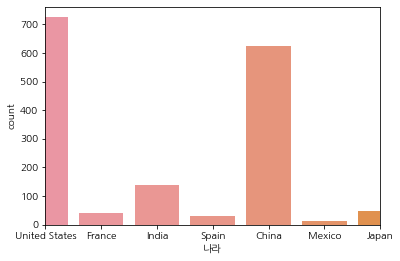

In [18]:
sns.countplot(x = '나라', data=df)
plt.xlim(0, 6)
plt.show()

* 미국이 가장 부자 수가 많았고, 중국이 2번째로 부자 수가 많았다.

### 3. 대학을 잘 나오면 성공할 확률이 높은가?

In [19]:
df['대학여부'] = df['출신대학'].fillna(1)
df['대학여부']

0          Bachelor of Arts/Science, Princeton University
1       Bachelor of Arts/Science, University of Pennsy...
2       Bachelor of Arts/Science, Ecole Polytechnique ...
3                            Drop Out, Harvard University
4                            Drop Out, Harvard University
                              ...                        
2750                                                    1
2751                                                    1
2752                                                    1
2753                                                    1
2754                                                    1
Name: 대학여부, Length: 2755, dtype: object

In [20]:
def score(x):
    if x == 1:
        return x
    else:
        return 2

In [21]:
df['대학여부'] = df['대학여부'].apply(score)
df

,이름,순자산,나라,회사,등수,나이,거주지,시민권,배우자,아이 수,출신대학,창업여부,대학여부
0,Jeff Bezos,177.0,United States,Amazon,1,57.0,"Seattle, Washington",United States,In Relationship,4.0,"Bachelor of Arts/Science, Princeton University",True,2
1,Elon Musk,151.0,United States,"Tesla, SpaceX",2,49.0,"Austin, Texas",United States,In Relationship,7.0,"Bachelor of Arts/Science, University of Pennsy...",True,2
2,Bernard Arnault & family,150.0,France,LVMH,3,72.0,"Paris, France",France,Married,5.0,"Bachelor of Arts/Science, Ecole Polytechnique ...",False,2
3,Bill Gates,124.0,United States,Microsoft,4,65.0,"Medina, Washington",United States,Divorced,3.0,"Drop Out, Harvard University",True,2
4,Mark Zuckerberg,97.0,United States,Facebook,5,36.0,"Palo Alto, California",United States,Married,2.0,"Drop Out, Harvard University",True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,Daniel Yong Zhang,1.0,China,e-commerce,2674,49.0,"Hangzhou, China",China,NaN,NaN,NaN,True,1
2751,Zhang Yuqiang,1.0,China,Fiberglass,2674,65.0,"Tongxiang, China",China,NaN,NaN,NaN,True,1
2752,Zhao Meiguang,1.0,China,gold mining,2674,58.0,"Jilin, China",China,NaN,NaN,NaN,True,1
2753,Zhong Naixiong,1.0,China,conglomerate,2674,58.0,"Foshan, China",China,NaN,NaN,NaN,True,1


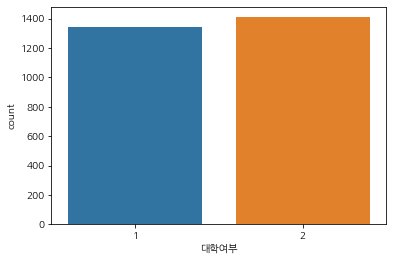

In [22]:
sns.countplot(x = '대학여부', data=df)
plt.show()